<a name="top"></a>
# Scikit-Learn Juptyer Notebook <img align="right" src="imgs/gmit_logo.jpg">
<br>
Submitted as part of the requirements for the Higher Diploma in Science(Data Analysis) 2020/2021
<br>

*****
*****

## Table of Contents:

- [Section 1: Overview of the scikit-learn package](#chapter1)

- [Section 2:Dataset: Penguin Dataset](#chapter2)

    - [Importing Packages for the Notebook](#chapter2a)
    - [Exploring the Dataset](#chapter2b)
    - [Preprocessing the Data](#chapter2c)
    - [Data Visualisation](#chapter2d)
    <br> 
    
- [Section 3: Train and Testing the Dataset](#chapter3)

- [Section 4: Data Modelling: Classification Machine Learning Algorithms](#chapter4)

    - [Random Forest](#chapter4a)
    - [Support Vector Machine](#chapter4b)
    - [Guassian Naive Bayes](#chapter4c)
    <br> 
    
- [Section 5: Conclusion](#chapter5)

- [References](#ref)

<a id='chapter1'></a>
##  Section 1: Overview of the scikit-learn package <img align="right" src="imgs/Scikit_learn_logo_small.svg">

<br>

### Defining Learning Problems with Scikit-Learn

<br>

***

The focus of machine learning is "acquiring skills or knowledge from experience *(1)*. Within the field itslef, there are many subfileds of study. The focus of this assessment is to explore how the scikit-learn library aids the development of machine learning in Python. 

scikit-learn was initially developed by David Cournapeau in 2007 before being further developed and publically released in 2010 by Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel. scikit-learn is an accesible, open source library for predicitive data analysis *(2)*. Its popularity of use is largely due to ease of use, being open sourse, portable, powerful and wide ranging content and relative flexibility for use in Machine Learning projects. The library provides methods of supervised and unsupervised learning algorithms including regression, classification and clustering of data. The library also offers other functions including ensemble methods, feature manipulation, outlier detection and model selection and validation. Built on existing libraries such as numpy, scipy and matplotlib, it enables users to conduct machine learning in many areas such as image and voice recognition, stock predictions and spam recognition *(3)*, *(4)*. 

<br>
Within the area of Machine Learning, there are two main learning problems. These are supervised and unsupervised learning. This notebook looks primarity at supervised learning problems within classification.
<br>
<br>

**Supervised learning** occurs when the data *"comes with additional attributes tht we want to predict"* *(5)*  The main aim is to assess and predict correlations of real world phenonema. The input and output are specified in this type of learning *(6)*.
<br>
- **classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class *(7)*

- **regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight *(8)* *(9)*. 
<br>
**Unsupervised learning** involves algorithms "consists of a set of input vectors x without any corresponding target values.... goal in such problems may be to discover groups of similiar examples within the data or to determine the distribution of data"*(10)*. The data and the recommendations generated from the algorithms are pre determined *(11)*.

<a id='chapter2'></a>
## 2. Dataset: Penguin Dataset
******

<a id='chapter2a'></a>
### Importing packages
<br>

To utilise the scikit-learn package, SciPy (Scientific Python) must be installed beforehand *(12)*. SciPy packages that will be used in this notebook are imported in the below code block alongwith the preferred plot modelling. 

In [512]:
import pandas as pd # numerical arrarys
import numpy as np # data frames
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical plots
import sklearn.model_selection as mod # helper functions
import sklearn.linear_model as ln # Logistic Regression
#Model Select
from sklearn.model_selection import train_test_split #training the set
from sklearn.naive_bayes import GaussianNB #Gaussian Classifies
from sklearn.metrics import accuracy_score, confusion_matrix #measuring accuracy
from sklearn.svm import SVC, LinearSVC #Support Vector
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.linear_model import  LogisticRegression #Logistic Regerssion
from sklearn.metrics import make_scorer, accuracy_score,precision_score #measuring predictions
from sklearn.metrics import classification_report #classifying results
from sklearn.metrics import confusion_matrix #measuring misclassifications
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score #measuring recall and accuracy
from sklearn import linear_model #logistic Regression
from sklearn.linear_model import SGDClassifier #logistic Regression

In [513]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [514]:
# https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv
df = pd.read_csv("penguins_size.csv") # reading in the datasets for all machine learning algorithm
df_Gaussian = pd.read_csv("penguins_size.csv")
df_Forest = pd.read_csv("penguins_size.csv")

<a id='chapter2b'></a>
### Exploring the Dataset

The Palmer Penguin dataset will be used in this project *13*. The dataset looks that the difference between 3 specie of penguin in the Antartica. This dataset was chosen for this notebook as it contains several attributes of penguins that are suitable for classification and regression modelling *14*.In this section, the dataset is explored at a higher level to establish any initial observations determine the scikit-learn packages that will be used and if there are any issues with the data that need to be resolved.

In [515]:
#looking at the datapoints
df.shape

(344, 7)

In [516]:
#looking at the information that was collected in the data points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [517]:
#sample of the data points
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
168,Chinstrap,Dream,50.3,20.0,197.0,3300.0,MALE
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,FEMALE
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,FEMALE
120,Adelie,Torgersen,36.2,17.2,187.0,3150.0,FEMALE
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
304,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,FEMALE
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
162,Chinstrap,Dream,46.6,17.8,193.0,3800.0,FEMALE


In [518]:
#types of species
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [519]:
# counts of each species
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [520]:
# name of islands in the dataset
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [521]:
# the number of penguins per island
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [522]:
#breakdown of sex between the two 
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [523]:
df.describe() # important in prediction of the class later on

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<a id='chapter2c'></a>
### Preprocessing the Data

Now that the initial exploratory data analysis is done, a deeper dive into the data set eeds to be conducted before a learning problem for the algorithms is defined.
<br>
From the initial analysis, there are null values within the dataset, this section explores this further and the potential impact it may have on the dataset.

In [524]:
# checking for null values
df.isnull().values.any()

True

In [525]:
# where are the null values contained
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [526]:
#total number of missing data points (15) 
df.isnull().sum().sum() 

19

In [527]:
# creating bool series True for NaN values (16) 
bool_series = pd.isnull(df["sex"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [528]:
df.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN will be dropped as gender may form part of the prediction process later on and these are incomplete datapoints

In [529]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [530]:
df.shape

(333, 7)

In [531]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [532]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [533]:
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [534]:
df.isnull().values.any()

False

In [535]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [536]:
df.isnull().sum().sum() 

0

In [537]:
# creating bool series True for NaN values 
bool_series = pd.isnull(df["sex"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [538]:
df.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN will be dropped as these are incomplete datapoints

In [539]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [540]:
df.shape

(333, 7)

In [541]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [542]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

<a id='chapter2d'></a>
### Data Visualisation

It seems that the from the previous 2 sections that after the intial data analysis and the removing of null values, the numbers of males and females appear to be the most equal.This will be important when conducting machine learning classification algorithms.

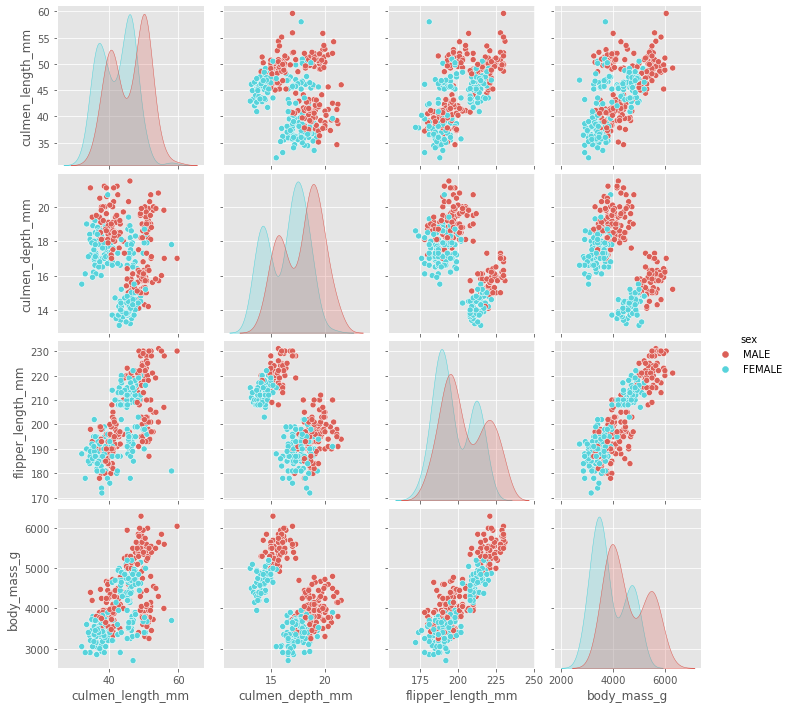

In [543]:
#using a pairplot to see the distribution of the sex variable and the relationship to the numerical variables.
sns.pairplot(data=df, hue='sex', palette=sns.color_palette(palette='hls' ,n_colors=2))

It can be inferred that the male atributes in a particular penguin species of the numerical variable are greater that those of their female.

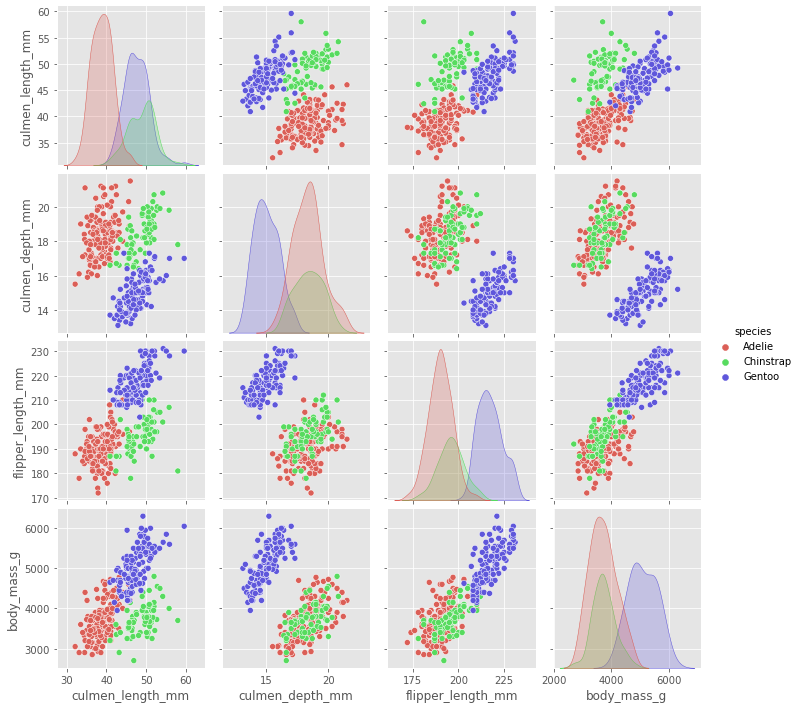

In [544]:
#using a pairplot to see the distribution of the species variable and the relationship to the numerical variables.
sns.pairplot(data=df, hue='species', palette=sns.color_palette(palette='hls' ,n_colors=3))

There are quite distinct attributes between the Gentoo and the other two penguin species which should make the Gentoo easier to classify.

Text(0, 0.5, 'Body Mass')

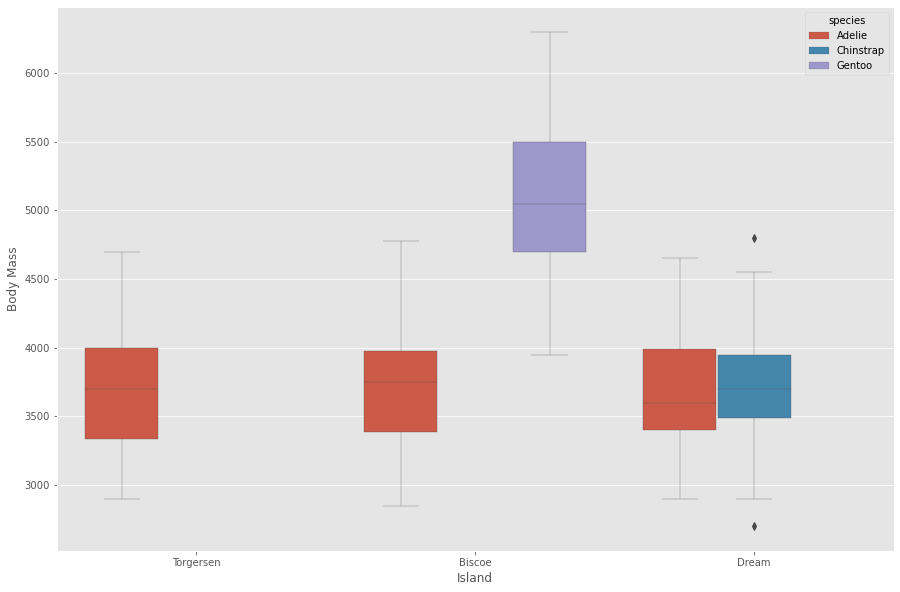

In [545]:
#looking at the breakdown between the species variable and the islands
#Exploring the impact of body mass on the dataset
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

Data visualisation is important for users of the data to immediately understand the data and the relationships between the variables.The above Pairplots and Boxplots provides an overview of the data and key information that will form the basis of future investigations. 
<br>
Key observations:
- From an initial analysis of the data, Gentoo seems to have different attributes to the other species making it possible to predict a Gentoo penguin from the other two species. 
- Adelie and Chinstrap are more similiar in their feature. Prediction of  each of the species from their attributes may be possible using measurements of the body mass and culmen length, culmen length and culmen depth and also flipper length and culmen length. 
- The island variable is a good indicator of the Adelie and Gentoo species as Adelie is the only penguin on the Torgerson island and Gentoo only resides on the Biscoe Island
- Males attributes tend to be greater that their female species counterpart
- Adelie is the most popular instance of penguin in the data set
- There appears to be a correlation between the flipper length and body mass for all penguins
- The culmen length and culmen depth in each of the species may be used as a way of predicting the species 

#### Correlation

This section further explores the relationships between the variables in the penguin dataset.
- **Correlation** measures the strength and direction of linear realtionships between two variables *(17)* 

*A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, as does the other (18)* 

In [546]:
matrix = df.corr()
print(matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228626           0.653096   
culmen_depth_mm           -0.228626         1.000000          -0.577792   
flipper_length_mm          0.653096        -0.577792           1.000000   
body_mass_g                0.589451        -0.472016           0.872979   

                   body_mass_g  
culmen_length_mm      0.589451  
culmen_depth_mm      -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


In [547]:
x = df.groupby('sex')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


In [548]:
x = df.groupby('island')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.248466,15.907362,209.558282,4719.171779
Dream,44.221951,18.339837,193.186992,3718.902439
Torgersen,39.038298,18.451064,191.531915,3708.510638


In [549]:
x = df.groupby('species')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


A correlation matrix visually indicates the relationship between two variables for the data set as a whole. 

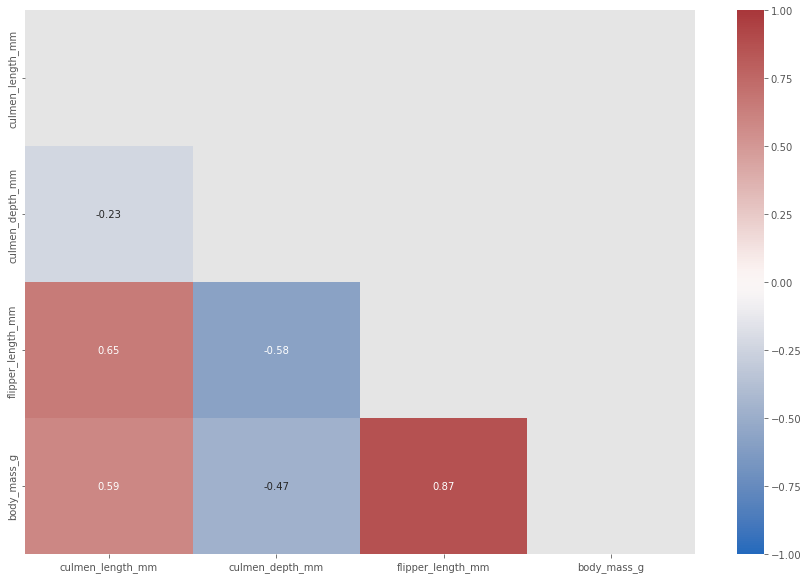

In [550]:
matrix = df.corr().round(2) # (19) https://datagy.io/python-correlation-matrix/
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

The values in the matrix above range from 0 - 1 with flipper length and body mass having the strongest correlation when considering all the specieis of penguins.

<a id='chapter3'></a>
## Train and Testing the Dataset

This section further explores the dataset, in particular the sex variable. The dataset is split into a train and test group to help with furture classification. The categoricial variable that will be used is sex. Data used in each of the subsequent classification algorithms will also be trained
<br>
**Defining the learning problem for the dataset**
<br>

*which algorithm can best predict the sex of the penguin based on numerical attributes contained in the dataset?*

To acheive this, the data will be split into a training and testing set of 70/30 and then classified using a Logistic Regression model as per class teaching. Using a two dimesional train/test split will visualise the location of the test set and the misclassifications if any.  

In [551]:
#Split our data in trainng and testing models
train, test = mod.train_test_split(df,test_size=0.30, random_state=0) #(20) (21) 

In [552]:
#size of test group
test.index.size

100

In [553]:
inputs, outputs = train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']], train['sex']

In [554]:
inputs.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
165,52.0,18.1,201.0,4050.0
156,52.7,19.8,197.0,3725.0
112,39.7,17.7,193.0,3200.0
220,46.1,13.2,211.0,4500.0
96,38.1,18.6,190.0,3700.0


In [555]:
outputs.head()

165      MALE
156      MALE
112    FEMALE
220    FEMALE
96     FEMALE
Name: sex, dtype: object

In [556]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE


In [557]:
train.index.size

233

In [558]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
62,Adelie,Biscoe,37.6,17.0,185.0,3600.0,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE


In [559]:
#test group
test.index.size

100

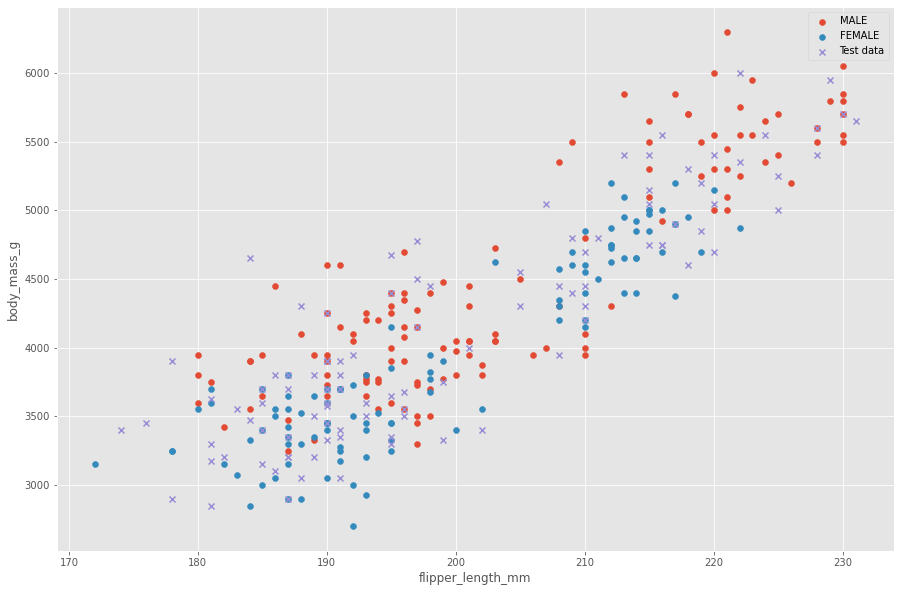

In [560]:
#further exploration of the two dimensional plot and identification of the positioning of the test data
male = train[train['sex'] == 'MALE']
female = train[train['sex'] == 'FEMALE']

             
fig, ax = plt.subplots()
             
ax.scatter(male['flipper_length_mm'], male['body_mass_g'], marker='o', label='MALE')
ax.scatter(female['flipper_length_mm'], female['body_mass_g'], marker='o', label='FEMALE')
 
        
ax.scatter(test['flipper_length_mm'], test ['body_mass_g'], marker ='x', label= 'Test data')
        
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')
ax.legend();

In [561]:
inputs, outputs = train[['flipper_length_mm', 'body_mass_g']], train['sex']

In [562]:
inputs.head()

,flipper_length_mm,body_mass_g
165,201.0,4050.0
156,197.0,3725.0
112,193.0,3200.0
220,211.0,4500.0
96,190.0,3700.0


In [563]:
outputs.head()

165      MALE
156      MALE
112    FEMALE
220    FEMALE
96     FEMALE
Name: sex, dtype: object

In [564]:
# applying a logistic algorithm to see if the flipper_length and body_mass can predict the sex of the penguin 
lre = ln.LogisticRegression(random_state=0)
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [565]:
predictions = lre.predict(test[['flipper_length_mm', 'body_mass_g']])
predictions

array(['FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE'],
     

In [566]:
predictions == test['sex']

62      True
60      True
283     True
107     True
65      True
       ...  
132     True
222    False
51      True
226    False
265    False
Name: sex, Length: 100, dtype: bool

In [567]:
lre.score(test[['flipper_length_mm', 'body_mass_g']], test['sex'])

0.78

In [568]:
test['predicted'] = predictions
test.head()


C:\Users\Owner1\AppData\Local\Temp/ipykernel_18176/3618166550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
62,Adelie,Biscoe,37.6,17.0,185.0,3600.0,FEMALE,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE,FEMALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE,MALE
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE,MALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE,MALE


In [569]:
misclass = test[test['predicted'] != test['sex']]
misclass

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE,FEMALE
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE,MALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE,MALE
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,FEMALE,MALE
278,Gentoo,Biscoe,43.2,14.5,208.0,4450.0,FEMALE,MALE
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,FEMALE,MALE
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,MALE,FEMALE
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE,MALE
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,FEMALE,MALE
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE,FEMALE


In [570]:
train.groupby('sex').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.689524,16.273333,198.847619,3935.714286
MALE,45.921094,18.026563,203.656250,4475.585938


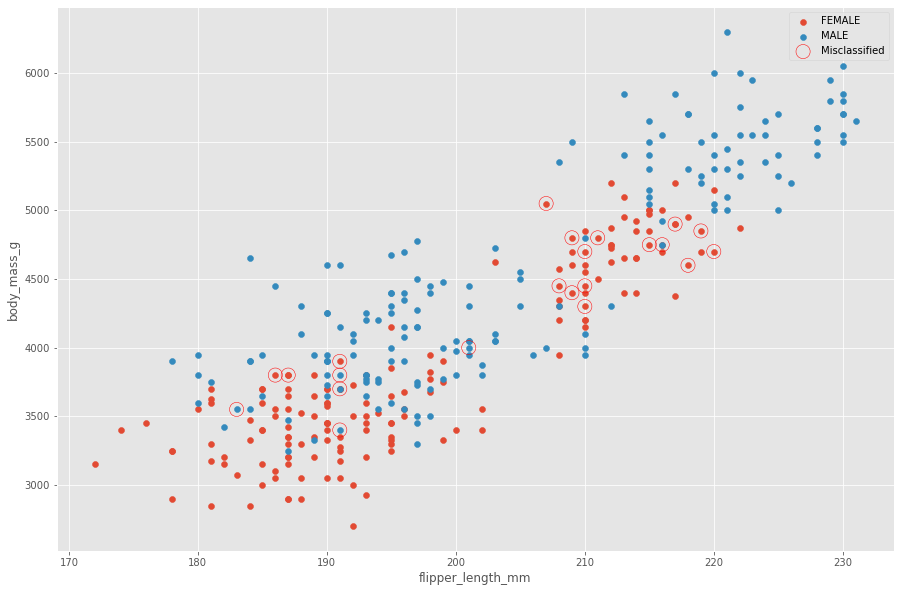

In [571]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('sex'):
    ax.scatter(data['flipper_length_mm'], data['body_mass_g'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['flipper_length_mm'], misclass['body_mass_g'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')
ax.legend();

In [572]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [573]:
# Use all four possible inputs.
inputs, outputs = train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], train['sex']

In [574]:
# Create a new classifier.
lre = ln.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [575]:
predictions = lre.predict(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
predictions

array(['MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE'], dtype=object)

In [576]:
# Eyeball the misclassifications.
(predictions == test['sex']).value_counts()

True     72
False    12
Name: sex, dtype: int64

In [577]:
# What proportion were correct?
lre.score(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], test['sex'])

0.8571428571428571

<a id='chapter4'></a>
## Data Modelling: Classification Machine Learning Algorithms
******

<a id='chapter4a'></a>
### Naive Bayes Gaussian Classification

Naive Bayes Gaussian Classification is a comprehensive, accurate and fast classification algorithm *(22)*. Some of the advantages of this classification are: low computational costs, speed and accuracy and outperforms other classifications when the assumption of independence is upheld among the variables.  

In [578]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [579]:
#df_Gaussian = pd.read_csv("penguins_size.csv")

In [580]:
print(df_Gaussian.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [581]:
df_Gaussian.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN 

In [582]:
# drop irrelevant columns
df_Gaussian.drop(['species'], axis=1, inplace=True)
df_Gaussian.drop(['island'], axis=1, inplace=True)
print(df_Gaussian.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE


In [583]:
X=df_Gaussian.iloc[:,:-1]
y=df_Gaussian.iloc[:,4]

In [584]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [585]:
y

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

In [586]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [587]:
NBModel=GaussianNB()
NBModel.fit(X_train,y_train)

GaussianNB()

In [588]:
y_predicted=NBModel.predict(X_test)

In [589]:
y_predicted

array(['FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',


In [590]:
accuracy_score(y_test,y_predicted)*100

89.0

In [591]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

      FEMALE       0.90      0.92      0.91        60
        MALE       0.87      0.85      0.86        40

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

[[55  5]
 [ 6 34]]


In [592]:
X_newval=np.array([51,16,222,5600])

In [593]:
y_pred=NBModel.predict([X_newval])

In [594]:
y_pred

array(['MALE'], dtype='<U6')

<a id='chapter4b'></a>
### Support Vector Machine Classification

Support Vector Machine can be used in both classifiation and regression algorithms. It aims to segregate the data in the best possible way. It is extremely accurate and fast to compute *(22)*.  

In [595]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [596]:
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


In [597]:
df = df.dropna()  #Drops all rows with at least one null value. 
D = df.values
x = D[:,2:6]
print(x)
y = D[:,6]
#print(y)
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.30,random_state=0)
model = SVC()
model.fit(x_tr,y_tr)

[[39.1 18.7 181.0 3750.0]
 [39.5 17.4 186.0 3800.0]
 [40.3 18.0 195.0 3250.0]
 ...
 [50.4 15.7 222.0 5750.0]
 [45.2 14.8 212.0 5200.0]
 [49.9 16.1 213.0 5400.0]]


SVC()

In [598]:
predict_sex = model.predict(x_ts)
print("Accuracy: ",accuracy_score(y_ts, predict_sex))

Accuracy:  0.79


In [599]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_ts,predict_sex))
print(confusion_matrix(y_ts,predict_sex))

              precision    recall  f1-score   support

      FEMALE       0.91      0.72      0.80        60
        MALE       0.68      0.90      0.77        40

    accuracy                           0.79       100
   macro avg       0.80      0.81      0.79       100
weighted avg       0.82      0.79      0.79       100

[[43 17]
 [ 4 36]]


<a id='chapter4c'></a>
### Random Forest Classification

The Random Forest algorithm can also be used for both regression and classification machine learning problems. The Random Forest Classifieris creates decision making trees on a dataset, creates a prediction and selects the most optium option allowing it to be extremely robust *(24)*. 

In [600]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# df_Forest = pd.read_csv("penguins_size.csv") # reading in the dataset
df_Forest = df_Forest.dropna()  #Drops all rows with at least one null value. 
print(df_Forest.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


In [601]:
sizes = df_Forest['sex'].value_counts(sort = 1)
print(sizes)

MALE      168
FEMALE    165
Name: sex, dtype: int64


In [602]:
df_Forest.drop(['species'], axis=1, inplace=True)
df_Forest.drop(['island'], axis=1, inplace=True)
print(df_Forest.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE


In [603]:
df_Forest.sex[df_Forest.sex == 'MALE'] = 1
df_Forest.sex[df_Forest.sex == 'FEMALE'] = 2
print(df_Forest.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g sex
0              39.1             18.7              181.0       3750.0   1
1              39.5             17.4              186.0       3800.0   2
2              40.3             18.0              195.0       3250.0   2
4              36.7             19.3              193.0       3450.0   2
5              39.3             20.6              190.0       3650.0   1


C:\Users\Owner1\AppData\Local\Temp/ipykernel_18176/4093300362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Forest.sex[df_Forest.sex == 'MALE'] = 1
C:\Users\Owner1\AppData\Local\Temp/ipykernel_18176/4093300362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Forest.sex[df_Forest.sex == 'FEMALE'] = 2


In [604]:
Y = df_Forest["sex"].values  #At this point Y is an object not of type int
print(Y)

[1 2 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 2 1
 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1
 1 2 1 2 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2
 1 1 2 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 1 1 2 2 1 2 1 1 2 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1 2 1 1 2
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 2 1]


In [605]:
Y=Y.astype('int')

In [606]:
X = df_Forest.drop(labels = ["sex"], axis=1)
print(X.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0


In [607]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
165              52.0             18.1              201.0       4050.0
156              52.7             19.8              197.0       3725.0
112              39.7             17.7              193.0       3200.0
220              46.1             13.2              211.0       4500.0
96               38.1             18.6              190.0       3700.0
..                ...              ...                ...          ...
332              43.5             15.2              213.0       4650.0
198              50.1             17.9              190.0       3400.0
123              41.4             18.5              202.0       3875.0
53               42.0             19.5              200.0       4050.0
178              50.5             18.4              200.0       3400.0

[233 rows x 4 columns]


In [608]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=0)

In [609]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)

[2 2 1 1 1 1 2 2 1 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 2 1 2 1 1 2 2 2 1 2
 2 2 1 1 2 1 2 1 2 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 1 1 2 2 1
 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2 2 1 1 2 1 1 2 2 1 2 2] [2 2 1 1 1 1 2 2 1 2 1 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 2 1 2 1 1 1 2 2 1 2
 2 2 1 1 2 1 2 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 1 1 2 1 2 1 1 2 2 2
 2 1 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 1 2 2 1 2 2]


In [610]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.93


In [611]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

culmen_depth_mm      0.352982
body_mass_g          0.315483
culmen_length_mm     0.207069
flipper_length_mm    0.124466
dtype: float64


In [612]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           1       0.88      0.95      0.92        40
           2       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

[[38  2]
 [ 5 55]]


Overall, the 3 main classification machine learning algorithms were implemented using the same parameters of test/train split and random state.
- Logistic Regression - 86%
- Gaussian Naive Bayes - 89%
- Support Vector Machine - 79%
- Random Forest Classifier - 93%

<br> 
There may be several reasons for the descrepencies in the outcome. Support Vector Machine works better in two class learning algorithms as it focuses on the distance between two points.Conversely, Random Forest performed the best but can be high in computational cost.
<br>
Logistic Regression works best with already identifiesd variable whereas Support Vector Machine can work with unstructured or image data sets.In this case, it would be advisable to use the Random Forest Classifier to predict the sex of the penguin using its attributes. It is important to note that the categorical variables, Island and Species were not included and perhaps could have given a more accurate result. 
<br>
The choice of machine learning algorithm largely depends on the data being collects and the learning problem in question. If this data sat focused on images instead or text or had two classes for exploration, different results would be expected. 

<a id='chapter5'></a>
## Conclusion
******

In conclusion, this notebook explored the Penguin Palmer dataset that investigates the attributes of 3 specieis of penguin living in the Anteratica. The dataset is easily understood by a wide range of audiences but challenging as it has 7 attributes accross 344 data points. The notebook look at the learning problem: can the sex of a penguin be predicted using the culmen length, culmen depth, body mass and flipper length as through exploratory data analysis indicated a relationship between the attributes. 
<br>
4 machine learning algorithms were implemented in total, *Logistic Regression* (based on class lectures and notes) and three classsification algorithms as per project outline: *Gaussian Naive Bayes*, *Support Vector Machine* and  *Random Tree Classifier*. Each of these were subject to the same parametes to carry out a prediction of the penguins sex. It was found that there was a difference in the precision levels between the difference implementation. 
<br>
This, however, should not lead to disregarding one method in preference to another. Each method has their advantages and disadvantages and the learnng problem in question and the data set attributes should be carefully considered. 

<a id='ref'></a>
## References 
<br>
1. https://machinelearningmastery.com/types-of-learning-in-machine-learning/
<br>
2. https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm
<br>
3. https://www.codecademy.com/article/scikit-learn
<br>
4. https://scikit-learn.org/stable/ 
<br>
5. https://scikit-learn.org/stable/tutorial/basic/tutorial.html
<br>
6. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
7. https://www.simplilearn.com/tutorials/machine-learning-tutorial/classification-in-machine-learning
<br>
8. http://www.sthda.com/english/wiki/regression-analysis-essentials-for-machine-learning 
<br>
9. https://www.investopedia.com/terms/r/regression.asp
<br>
10. https://scikit-learn.org/stable/tutorial/basic/tutorial.html
<br>
11. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
12. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library
<br>
13. Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package       version 0.1.0.https://allisonhorst.github.io/palmerpenguins/. doi:10.5281/zenodo.3960218.
<br>
14. https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv
<br>
15. https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
<br>
16. https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
<br>
17. https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:
<br>
18. https://datagy.io/python-correlation-matrix/
<br>
19. https://datagy.io/python-correlation-matrix/ 
<br>
20. https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
<br>
21. Machine Learning and Statistic Class Leactures and Notes
<br>
22. https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
<br>
23. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python 
<br>
24. https://www.datacamp.com/community/tutorials/random-forests-classifier-python
<br>

# End

*******